In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.groupby('Sex')['Age'].mean().reset_index()

,Sex,Age
0,female,27.915709
1,male,30.726645


In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [11]:
df.head(8).style.background_gradient()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.700000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.550000,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.000000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.500000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.000000,C23 C25 C27,S


In [12]:
gender = df['Sex'].value_counts()
gender

male      107
female     95
Name: Sex, dtype: int64

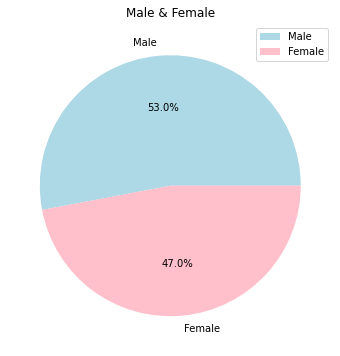

In [13]:
plt.figure(figsize=(10,6))
plt.pie(gender, labels=['Male', 'Female'] ,autopct='%.1f%%', colors=['lightblue','pink'])
plt.legend()
plt.title('Male & Female')
plt.show()

In [14]:
df.corr

<bound method DataFrame.corr of      PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                   

In [15]:
def bar_chart(feature):
    survived=df[df["Survived"]==1][feature].value_counts()
    dead=df[df["Survived"]==0][feature].value_counts()
    d=pd.DataFrame([survived,dead])
    d.index=["Survived","Dead"]
    d.plot(kind="bar",stacked=True,figsize=(10,5))

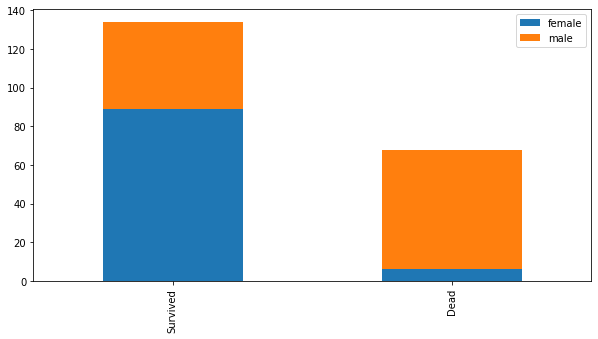

In [16]:
bar_chart("Sex")

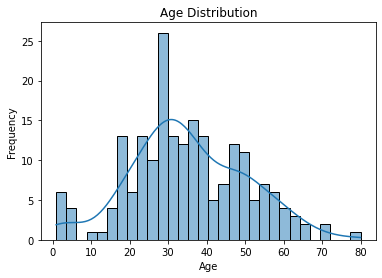

In [17]:
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
embark=pd.DataFrame(df["Embarked"].unique())
embark

,0
0,C
1,S
2,Q


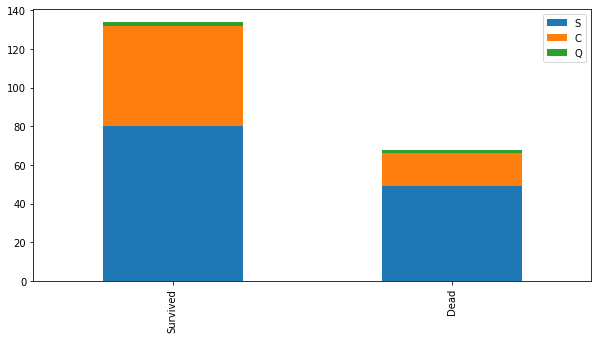

In [18]:
bar_chart("Embarked")

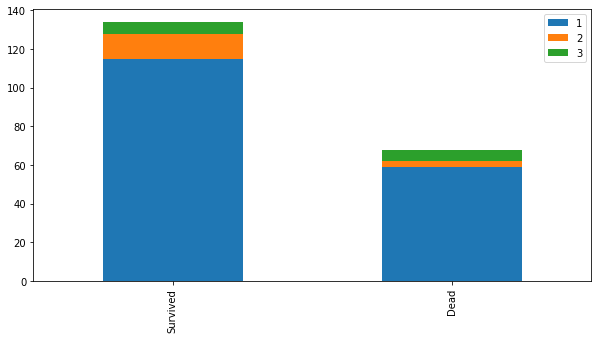

In [20]:
bar_chart("Pclass")

Text(0, 0.5, 'Numbers')

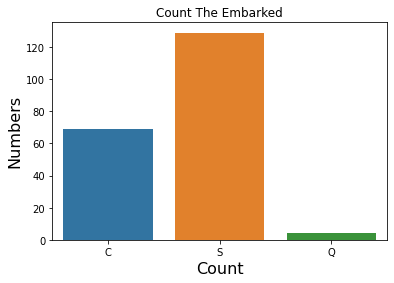

In [23]:
sns.countplot(x="Embarked",data=df)
plt.title("Count The Embarked")
plt.xlabel("Count",fontsize=16,c="k")
plt.ylabel("Numbers",fontsize=16,c="k")

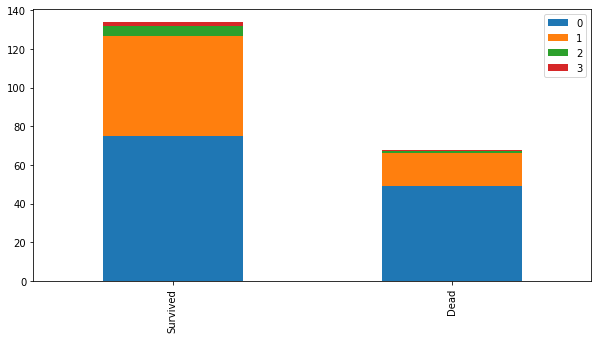

In [22]:
bar_chart("SibSp")

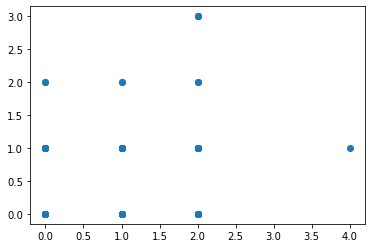

In [28]:
plt.scatter(df["Parch"],df["SibSp"])

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

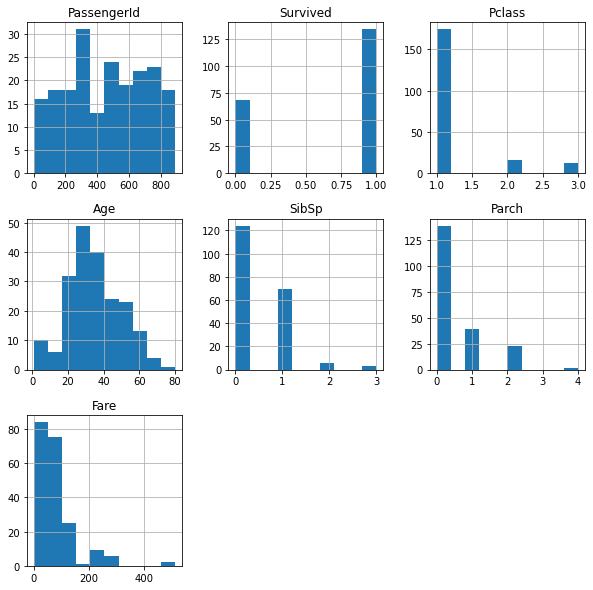

In [24]:
df.hist(figsize=(10,10))

C:\Users\hp\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Fare', ylabel='Density'>

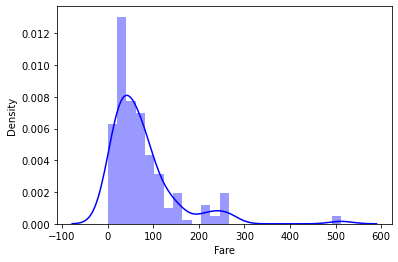

In [29]:
sns.distplot(df["Fare"],color="b")

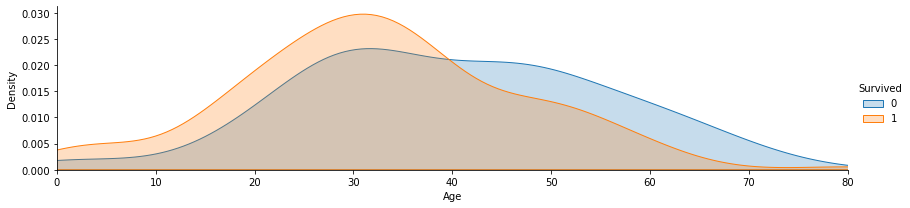

In [30]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

In [52]:
Encoder=LabelEncoder()
df["Sex"]=Encoder.fit_transform(df["Sex"])
df["Sex"]

1      0
3      0
6      1
10     0
11     0
      ..
871    0
872    1
879    0
887    0
889    1
Name: Sex, Length: 202, dtype: int64

In [53]:
Encoder=LabelEncoder()
df["Embarked"]=Encoder.fit_transform(df["Embarked"])
df["Embarked"]

1      0
3      2
6      2
10     2
11     2
      ..
871    2
872    2
879    0
887    2
889    0
Name: Embarked, Length: 202, dtype: int64

In [36]:
test = df.drop(['PassengerId','Name','Ticket'], axis=1)
test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,0,38.0,1,0,71.2833,C85,0
3,1,1,0,35.0,1,0,53.1000,C123,2
6,0,1,1,54.0,0,0,51.8625,E46,2
10,1,3,0,4.0,1,1,16.7000,G6,2
11,1,1,0,58.0,0,0,26.5500,C103,2
...,...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,52.5542,D35,2
872,0,1,1,33.0,0,0,5.0000,B51 B53 B55,2
879,1,1,0,56.0,0,1,83.1583,C50,0
887,1,1,0,19.0,0,0,30.0000,B42,2


In [37]:
label_encoder = LabelEncoder()
test['Sex'] = label_encoder.fit_transform(test['Sex'])
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])

In [49]:
Encoder=LabelEncoder()
df["Embarked"]=Encoder.fit_transform(df["Embarked"])
df["Embarked"]

1      0
3      2
6      2
10     2
11     2
      ..
871    2
872    2
879    0
887    2
889    0
Name: Embarked, Length: 202, dtype: int64

In [47]:
df_data=[df]
for dataset in df_data:
    dataset["title"]=dataset["Name"].str.extract("([A-Za-z]+)\.",expand=False)

In [48]:
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Mlle":3,"Major":3,"Col":3,
               "Countess":3,"Capt":3,"Ms":3,"Sir":3
               ,"Lady":3,"Mme":3,"Don":3,"Jonkheer":3}
for dataset in df_data:
    dataset["title"]=dataset["title"].map(title_mapping)

In [51]:
df=df.drop(["Name","Cabin","Ticket"],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
1,2,1,1,0,38.0,1,0,71.2833,0,2
3,4,1,1,0,35.0,1,0,53.1000,2,2
6,7,0,1,1,54.0,0,0,51.8625,2,0
10,11,1,3,0,4.0,1,1,16.7000,2,1
11,12,1,1,0,58.0,0,0,26.5500,2,1
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,0,47.0,1,1,52.5542,2,2
872,873,0,1,1,33.0,0,0,5.0000,2,0
879,880,1,1,0,56.0,0,1,83.1583,0,2
887,888,1,1,0,19.0,0,0,30.0000,2,1


In [54]:
imputer=SimpleImputer(strategy="median")
imputed_df=imputer.fit_transform(df)
imputed_df=pd.DataFrame(imputed_df,columns=df.columns)
imputed_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,2.0
1,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,2.0
2,7.0,0.0,1.0,1.0,54.0,0.0,0.0,51.8625,2.0,0.0
3,11.0,1.0,3.0,0.0,4.0,1.0,1.0,16.7000,2.0,1.0
4,12.0,1.0,1.0,0.0,58.0,0.0,0.0,26.5500,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
197,872.0,1.0,1.0,0.0,47.0,1.0,1.0,52.5542,2.0,2.0
198,873.0,0.0,1.0,1.0,33.0,0.0,0.0,5.0000,2.0,0.0
199,880.0,1.0,1.0,0.0,56.0,0.0,1.0,83.1583,0.0,2.0
200,888.0,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0,1.0


In [55]:
x=imputed_df.drop(["Survived"],axis=1)
y=df["Survived"]
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,2.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,2.0
1,4.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,2.0
2,7.0,1.0,1.0,54.0,0.0,0.0,51.8625,2.0,0.0
3,11.0,3.0,0.0,4.0,1.0,1.0,16.7000,2.0,1.0
4,12.0,1.0,0.0,58.0,0.0,0.0,26.5500,2.0,1.0
...,...,...,...,...,...,...,...,...,...
197,872.0,1.0,0.0,47.0,1.0,1.0,52.5542,2.0,2.0
198,873.0,1.0,1.0,33.0,0.0,0.0,5.0000,2.0,0.0
199,880.0,1.0,0.0,56.0,0.0,1.0,83.1583,0.0,2.0
200,888.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0,1.0


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
clf1=KNeighborsClassifier(n_neighbors=10)
clf1.fit(x_train,y_train)
clf1.score(x_train,y_train)

0.7453416149068323

In [58]:
y_pred1 = clf1.predict(x_test)
y_pred1

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1],
      dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score
k=accuracy_score(y_test,y_pred1)
k

0.5853658536585366

In [60]:
from sklearn.metrics import confusion_matrix ,accuracy_score
cm=confusion_matrix(y_test,y_pred1)
print(cm)
accuracy_score=(y_test,y_pred1)

[[ 4 11]
 [ 6 20]]


<AxesSubplot:>

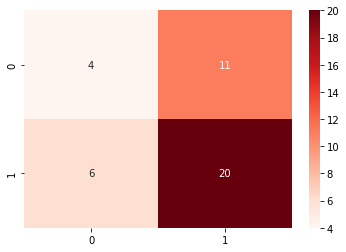

In [61]:
sns.heatmap(cm,annot=True,cmap="Reds")

In [62]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier(n_estimators=10,random_state=0,max_depth=6,max_features=4)
clf2.fit(x_train,y_train)
clf2.score(x_train,y_train)

0.9440993788819876

In [63]:
y_pred2=clf2.predict(x_test)
y_pred2

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred2)
a

0.7804878048780488

In [65]:
from sklearn.linear_model import LogisticRegression
clfw=LogisticRegression(random_state=0)
clfw.fit(x_train,y_train)
clfw.score(x_train,y_train)

C:\Users\hp\anaconda3\anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7763975155279503

In [66]:
y_predw=clfw.predict(x_test)
y_predw

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score
v=accuracy_score(y_test,y_predw)
v

0.8048780487804879

In [68]:

from sklearn.tree import DecisionTreeClassifier
clfc=DecisionTreeClassifier(random_state=0,max_depth=10,max_features=3)
clfc.fit(x_train,y_train)
clfc.score(x_train,y_train)

0.9192546583850931

In [69]:
y_predc=clfc.predict(x_test)
y_predc

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,y_predc)
b

0.7560975609756098